# PRACTICE 2

## FUNCTIONS

In [1]:
from sympy import dsolve, Eq, symbols, Function, solve, sinh, sin, cos, cosh
from sympy.plotting import plot
from matplotlib import pyplot as plt 
import numpy as np
from sympy import lambdify



def plot_difeq(eq):
    difx=eq
    difxlamb=lambdify(x, difx, 'numpy')
    xvals=np.arange(-5, 5, 0.1)
    difxvals=difxlamb(xvals)
    plt.figure
    plt.plot(xvals, difxvals)
    plt.xlabel('x')
    plt.ylabel('V(x)')
    ax=plt.gca() 
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.1)
    
    return plt.show()



def sol_potential(f):
    dEq1 = Eq(v(x).diff(x),-f)

    sol = dsolve(dEq1)

    return(sol)



def fixed_point(eq):
    difx = eq
    fxp_calculation = solve([difx,v(x)]) 
    return fxp_calculation             




def stability(eq):
    difx = eq
    difxlamb = lambdify(x, difx, 'numpy')
    
    fxp_calculation = fixed_point(eq) 
    x_fxp = [] 
    
    for d in range(0, len(fxp_calculation)):
        dictionary = fxp_calculation[d][x] 
        x_fxp.append(dictionary) 
    
    for value in x_fxp:
        if difx.subs({x:value - 0.01}) > 0:
            if difx.subs({x:value + 0.01}) < 0:
                print("stable (local minimum in v(x)):", value)
        if difx.subs({x:value - 0.01}) < 0:
            if difx.subs({x:value + 0.01}) > 0:
                print('unstable (local maximum in v(x)):', value)
    return plt.show()


def sol_general( b ):

    dEq1 = Eq(x(t).diff(t), b)

    sol = dsolve(dEq1)

    return(sol)



def sol_particular(a,b,c):
    
    C1 = symbols ('C1')

    soldEq1RHS = c.rhs  

    

    soldEq1RHS_S = soldEq1RHS.subs({t:a})
    
    CI = b

    C1_ic = solve(soldEq1RHS_S - CI, C1)

    soldEq1_CI =  soldEq1RHS.subs({C1:C1_ic[0]})
    
    return (soldEq1_CI)

## 1 POTENTIALS AND FIXED POINTS

EQ1
V(x)= x**3/3 - x**2/2


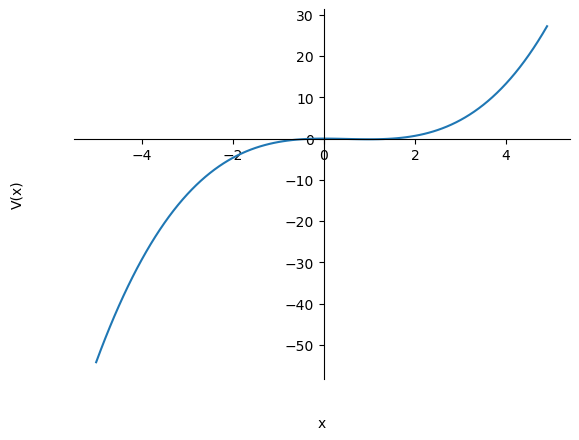

Equilibrium points: [{x: 0, v(x): 0}, {x: 1, v(x): 0}]
unstable (local maximum in v(x)): 0
stable (local minimum in v(x)): 1

General sol: Eq(y(x), C1 - x**3/3 + x**2/2)

EQ2
V(x) cos(x) - 1


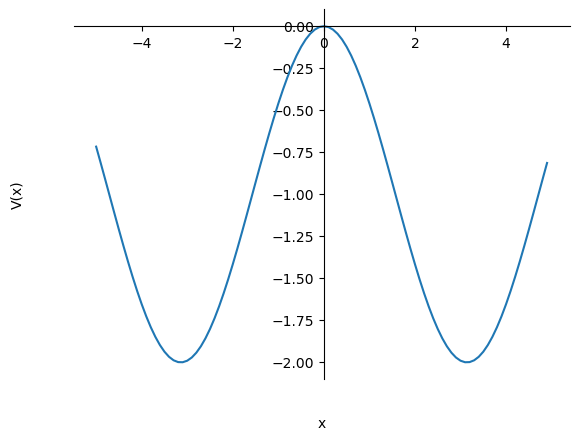

Equilibrium points: [{x: 0, v(x): 0}, {x: pi, v(x): 0}]
unstable (local maximum in v(x)): 0
stable (local minimum in v(x)): pi

General sol: Eq(y(x), C1 - cos(x))

EQ3
V(x)= cosh(x) - 1


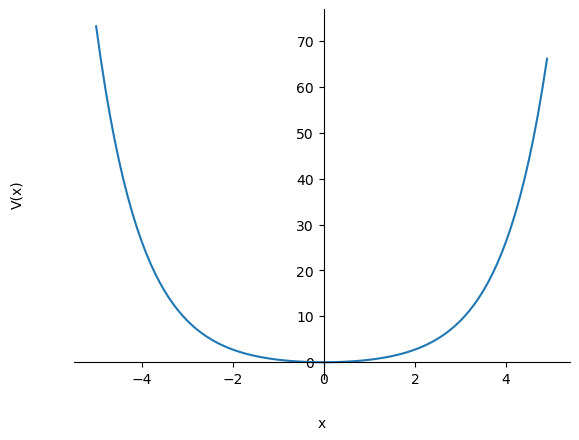

Equilibrium points: [{x: 0, v(x): 0}]
stable (local minimum in v(x)): 0

General sol: Eq(y(x), C1 - cosh(x))
Eq(v(x), cos(x) - 1)


In [2]:
x=symbols('x', real=True)
v= symbols('v', cls=Function)
y= symbols('y', cls=Function)

#1
print('EQ1')
f1=x-x**2
C1=symbols('C1')

soldEq1=sol_potential(f1)
soldEq1RHS=soldEq1.rhs
soldEq1RHS_S=soldEq1RHS.subs({x : 0})
CI=0
C1_ic=solve(soldEq1RHS_S, C1)[0]
soldEq1_IC=soldEq1.subs({C1 : C1_ic})

print('V(x)=', soldEq1_IC.rhs)
plot_difeq(soldEq1_IC.rhs)
print('Equilibrium points:', fixed_point(f1))
stability(f1)

dEq11= Eq(y(x).diff(x), f1)
soldEq11=dsolve(dEq11, y(x))
print('\nGeneral sol:', soldEq11)

#2
print('\nEQ2')
f2=sin(x)
dEq2= Eq(v(x).diff(x), -f2)
soldEq2=dsolve(dEq2, v(x))
C1=symbols('C1')
soldEq2RHS=soldEq2.rhs
soldEq2RHS_S=soldEq2RHS.subs({x : 0})
CI=0
C1_ic=solve(soldEq2RHS_S, C1)[0]
soldEq2_IC=soldEq2.subs({C1 : C1_ic})

print('V(x)', soldEq2_IC.rhs)
plot_difeq(soldEq2_IC.rhs)
print('Equilibrium points:', fixed_point(f2))
stability(f2)

dEq21= Eq(y(x).diff(x), f2)
soldEq21=dsolve(dEq21, y(x))
print('\nGeneral sol:', soldEq21)

#3
print('\nEQ3')
f3=-sinh(x)
dEq3= Eq(v(x).diff(x), -f3)
soldEq3=dsolve(dEq3, v(x))
C1=symbols('C1')
soldEq3RHS=soldEq3.rhs
soldEq3RHS_S=soldEq3RHS.subs({x : 0})
CI=0
C1_ic=solve(soldEq3RHS_S, C1)[0]
soldEq3_IC=soldEq3.subs({C1 : C1_ic})

print('V(x)=', soldEq3_IC.rhs)
plot_difeq(soldEq3_IC.rhs)
print('Equilibrium points:', fixed_point(f3))
stability(f3)

dEq31= Eq(y(x).diff(x), f3)
soldEq31=dsolve(dEq31, y(x))
print('\nGeneral sol:', soldEq31)
print(soldEq2_IC)

## 2 I.V. PROBLEM + EULER,ENHACED EULER,RUNGEKUTTA

In [3]:
#2
from sympy import dsolve, Eq, symbols, Function, solve, diff, lambdify, sin, cos, log
from sympy.plotting import plot
from matplotlib import pyplot as plt
import numpy as np
from math import e, tanh
from scipy.integrate import odeint

x = symbols('x', cls=Function)
t = symbols('t')
C1 = symbols('C1')
dEq2 = Eq(x(t).diff(t), -x(t))
soldEq2 = dsolve(dEq2, x(t))
print(soldEq2)
soldEq2RHS = soldEq2.rhs
soldEq2RHS_S = soldEq2RHS.subs({t : 0})
CI = 1 
CI_ic = solve(soldEq2RHS_S - CI, C1)[0] 
soldEq2_IC = soldEq2.subs({C1: CI_ic}) 
print(soldEq2_IC)

Eq(x(t), C1*exp(-t))
Eq(x(t), exp(-t))


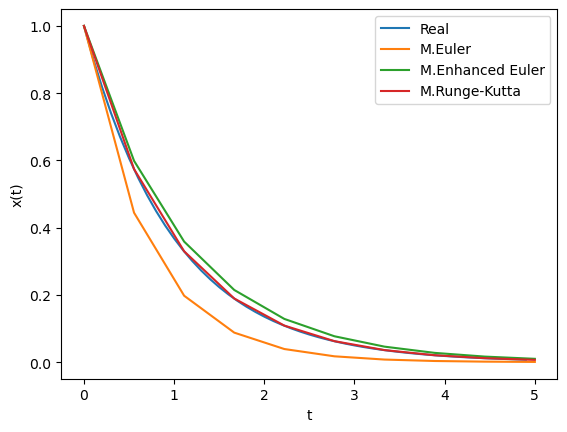

In [4]:


def MyEuler(x0, t0, tf, nPts, f):
    step_h = (tf-t0)/(nPts-1)
    t = np.linspace(t0, tf, nPts)
    x = np.zeros([nPts])
    x[0] = x0
    for n in range(0, len(t)-1):
        x[n+1] = x[n]+f(x[n])*(t[n+1]-t[n])
    return t, x

def MyEnhancedEuler(x0, t0, tf, nPts, f):
    t = np.linspace(t0, tf, nPts)
    x = np.zeros([nPts])
    x[0] = x0
    for n in range(0, len(t)-1):
        x[n+1] = x[n]+f(x[n])*(t[n+1]-t[n])
        x[n+1] = x[n]+((1/2)*(f(x[n])+f(x[n+1]))*(t[n+1]-t[n]))
    return t, x

def MyRungeKutta(x0, t0, tf, nPts, f):
    t = np.linspace(t0, tf, nPts)
    x = np.zeros([nPts])
    x[0] = x0
    for n in range(0, len(t)-1):
        k1 = f(x[n])*(t[n+1]-t[n])
        k2 = f(x[n] + (1/2)*k1)*(t[n+1]-t[n])
        k3 = f(x[n] + (1/2)*k2)*(t[n+1]-t[n])
        k4 = f(x[n] + k3)*(t[n+1]-t[n])
        
        x[n+1] = x[n]+ (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return t, x


x = symbols('x')
fx = lambdify(x, -x , 'numpy')
x0 = 1
t0 = 0
tf = 5
nPts = 10
tvals_euler = MyEuler(x0, t0, tf, nPts, fx)[0]
xvals_euler = MyEuler(x0, t0, tf, nPts, fx)[1]

tvals_eulerplus = MyEnhancedEuler(x0, t0, tf, nPts, fx)[0]
xvals_eulerplus = MyEnhancedEuler(x0, t0, tf, nPts, fx)[1]

tvals_runge = MyRungeKutta(x0, t0, tf, nPts, fx)[0]
xvals_runge = MyRungeKutta(x0, t0, tf, nPts, fx)[1]

fSol = lambdify(t, soldEq2_IC.rhs, 'numpy')
tvals = np.arange(0, 5, 0.1)
xvals = fSol(tvals)
plt.figure
plt.plot(tvals, xvals)
plt.figure
plt.plot(tvals_euler, xvals_euler)
plt.figure
plt.plot(tvals_eulerplus, xvals_eulerplus)
plt.figure
plt.plot(tvals_runge, xvals_runge)
plt.gca().legend(('Real','M.Euler', 'M.Enhanced Euler', 'M.Runge-Kutta'))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

## ERRORS

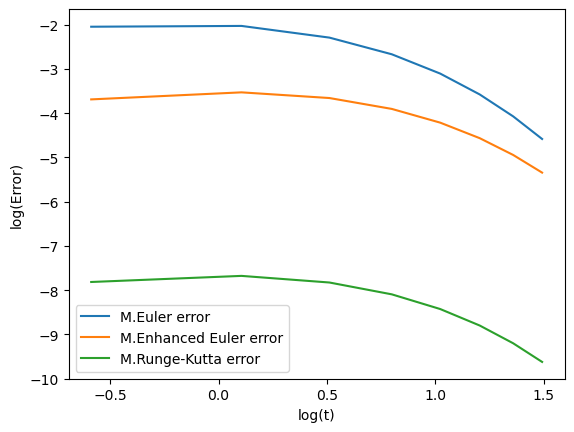

In [5]:
def calc_errors(t0, tf, nPts, xvals, f):
    try:
        t = np.linspace(t0, tf, nPts)
        error = np.zeros([nPts])
        for n in range(0, len(t)-1):
            error[n] = abs(f(t[n]) - xvals[n])
            
    except TypeError:
            error[n] = 0
    return error


def log_error(error_val, tvals, nPts):
    log_error = np.zeros([nPts])
    log_tvals = np.zeros([nPts])
    for i in range(0, len(error_val)-1):
        try:
            log_error[i] = log(error_val[i])
            log_tvals[i] = log(tvals[i])
        except TypeError:
            log_error[i] = 0
            log_tvals[i] = 0     
    log_error = list(log_error)
    log_tvals = list(log_tvals)
    for n in log_error:
        if float(n) == 0.0:
            log_error.remove(n)
    for e in log_tvals:
        if float(e) == 0.0:
            log_tvals.remove(e)
    return log_error, log_tvals

error_vals_euler= log_error(calc_errors(t0, tf, nPts, xvals_euler, fSol),tvals_euler, nPts)[0]
error_vals_eulerplus = log_error(calc_errors(t0, tf, nPts, xvals_eulerplus, fSol),tvals_eulerplus, nPts)[0]
error_vals_runge = log_error(calc_errors(t0, tf, nPts, xvals_runge, fSol),tvals_runge, nPts)[0]
time_vals_euler = log_error(calc_errors(t0, tf, nPts, xvals_euler, fSol),tvals_euler, nPts)[1]
time_vals_eulerplus = log_error(calc_errors(t0, tf, nPts, xvals_euler, fSol),tvals_euler, nPts)[1]
time_vals_runge = log_error(calc_errors(t0, tf, nPts, xvals_euler, fSol),tvals_euler, nPts)[1]

plt.figure
plt.plot(time_vals_euler, error_vals_euler)
plt.figure
plt.plot(time_vals_eulerplus, error_vals_eulerplus)
plt.figure
plt.plot(time_vals_runge, error_vals_runge)
plt.gca().legend(('M.Euler error', 'M.Enhanced Euler error', 'M.Runge-Kutta error'))
plt.xlabel('log(t)')
plt.ylabel('log(Error)')
plt.show()

## 3 I.V. PROBLEM + EULER,ENHACED EULER,RUNGEKUTTA

In [6]:


x = symbols('x', cls=Function)
t = symbols('t')
C1 = symbols('C1')
dEq2 = Eq(x(t).diff(t), (x(t) + e**(-x(t))))
soldEq2 = dsolve(dEq2, x(t))
soldEq2RHS = soldEq2.rhs 
soldEq2RHS_S = soldEq2RHS.subs({t : 0}) 
CI = 0 


CI_ic = solve(soldEq2RHS_S - CI, C1)[0] 
soldEq2_IC = soldEq2.subs({C1: CI_ic}) 
print(soldEq2_IC)
print('there is no analytical solution for x(t)')

Eq(-Integral(54365636569181.0**_y/(20000000000000.0**_y + 54365636569181.0**_y*_y), (_y, x(t))), -t)
there is no analytical solution for x(t)


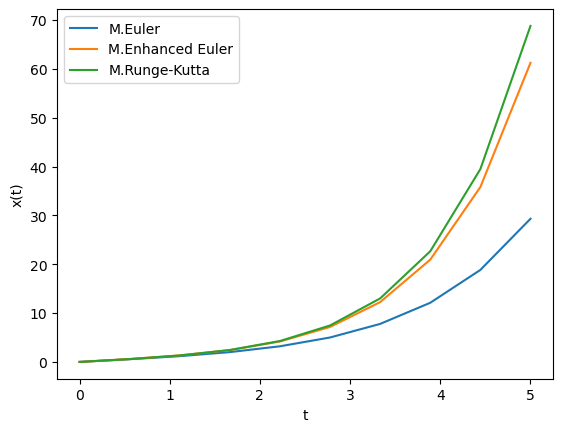

In [7]:


from sympy import dsolve, Eq, symbols, Function, solve, diff, lambdify, sin, cos, log
from sympy.plotting import plot
from matplotlib import pyplot as plt
import numpy as np
from math import e, tanh
from scipy.integrate import odeint



x = symbols('x')
fx = lambdify(x, x + e**(-x) , 'numpy')
x0 = 0
t0 = 0
tf = 5
nPts = 10

tvals_euler = MyEuler(x0, t0, tf, nPts, fx)[0]
xvals_euler = MyEuler(x0, t0, tf, nPts, fx)[1]

tvals_eulerplus = MyEnhancedEuler(x0, t0, tf, nPts, fx)[0]
xvals_eulerplus = MyEnhancedEuler(x0, t0, tf, nPts, fx)[1]

tvals_runge = MyRungeKutta(x0, t0, tf, nPts, fx)[0]
xvals_runge = MyRungeKutta(x0, t0, tf, nPts, fx)[1]


plt.figure
plt.plot(tvals_euler, xvals_euler)
plt.figure
plt.plot(tvals_eulerplus, xvals_eulerplus)
plt.figure
plt.plot(tvals_runge, xvals_runge)
plt.gca().legend(('M.Euler', 'M.Enhanced Euler', 'M.Runge-Kutta'))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()